# AML3104 - Neural Networks and Deep Learning
# Assignment #1
# Group Zero Budget

Team members:
- Aanal Patel - ID: 910376
- Danilo Diaz - ID: 889539
- Ernie Sumoso - ID: 881591
- Jay Saravanan - ID: 910392
- Yogita Sharma - ID:

## Table of Contents <a class="anchor" id="toc"></a>
* [Intro: Import Libraries](#intro-0)
* [Intro: Load Dataset](#intro-1)
* [Intro: Split Data](#intro-2)
* [Part I-a. Sampling happy and sad faces](#part-1a)
* [Part I-b. PCA and LDA to represent faces](#part-1b)
* [Part I-c. Naive Bayes classification](#part-1c)
* [Part I-d. Logistic Regression classification](#part-1d)
* [Part I-e. Support Vector Machine classification](#part-1e)
* [Part I-f. Question To Answer](#part-1f)
* [Part I-g. Showing 5 happiest and saddest faces](#part-1g)
* [Part II-a. Applying PCA and LDA and plotting cumulative variance of binary vs multiclass principal components](#part-2a)
* [Part II-b. Naive Bayes multiclass classification](#part-2b)
* [Part II-c. Logistic Regression multiclass classification](#part-2c)
* [Part II-d. Support Vector Machine multiclass classification](#part-2d)
* [Part II-e. Question To Answer](#part-2e)
* [Part II-f. Solution to identify mislabeled images](#part-2f)


### Intro: Import libraries <a class="anchor" id="intro-0"></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

### Intro: Load dataset <a class="anchor" id="intro-1"></a>

In [3]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

### Intro: Split data <a class="anchor" id="intro-2"></a>

In [4]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [5]:
def get_emotion(whichemotion):
    emotion_dict = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    return emotion_dict[indx]

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


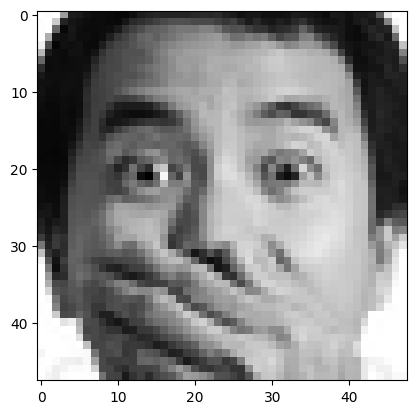

facial emotion: surprise


In [6]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad <a class="anchor" id="part-1a"></a>

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

### Part I - a) Sampling happy and sad faces 

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [7]:
import pandas as pd

def sample_dataset(x, y, emotions):
    # initialize sample subsets of the datasets passed as parameters
    sample_x = []
    sample_y = []

    # loop through the target values
    for i, y_instance in enumerate(y):

        # if the target value (emotion) is found within the list of emotions (parameter)
        emotion = get_emotion(y_instance)
        if emotion in emotions:

            # add the sample to the subset
            sample_x.append(list(x[i]))
            sample_y.append(emotions.index(emotion))

    # return nummpy arrays of the sample datasets (dependant and target variables)
    return np.array(sample_x), np.array(sample_y)

# sample dataset to include only happy or sad faces
sample_x_train, sample_y_train = sample_dataset(x_training, y_training, ['sad', 'happy'])
sample_x_test, sample_y_test = sample_dataset(x_testing, y_testing, ['sad', 'happy'])

In [8]:
# display: (number of happy or sad faces, image resolution)
print("(#instances, pixel width, pixel height):")
sample_x_train.shape

(#instances, pixel width, pixel height):


(12045, 48, 48)

In [9]:
# sample emotion specific subsets for data visualization
happy_x_train, happy_y_train = sample_dataset(x_training, y_training, ['happy'])
sad_x_train, sad_y_train = sample_dataset(x_training, y_training, ['sad'])
happy_x_test, happy_y_test = sample_dataset(x_testing, y_testing, ['happy'])
sad_x_test, sad_y_test = sample_dataset(x_testing, y_testing, ['sad'])

In [10]:
# set the data needed from our subsets for data visualization
happy_data = [happy_x_train, happy_y_train, happy_x_test, happy_y_test]
happy_data = list(map(len, happy_data))
sad_data = [sad_x_train, sad_y_train, sad_x_test, sad_y_test]
sad_data = list(map(len, sad_data))
total_data = [x_training, y_training, x_testing, y_testing]
total_data = list(map(len, total_data))

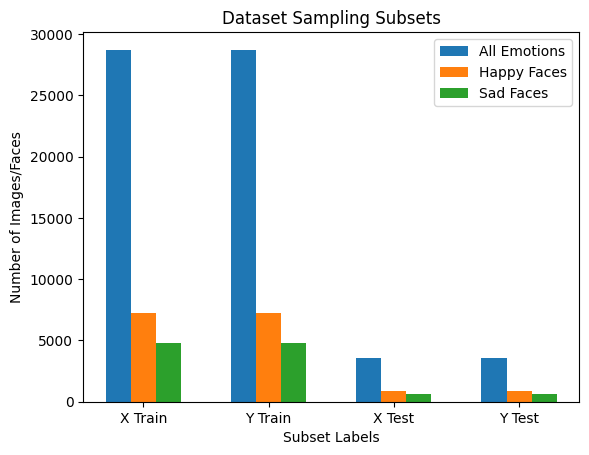

In [11]:
# Plot sampling subset comparison using bar plot
subset_labels = ['X Train','Y Train','X Test','Y Test'] 
x_axis = np.arange(len(subset_labels)) 

plt.bar(x_axis - 0.2, total_data, 0.2, label = 'All Emotions')
plt.bar(x_axis, happy_data, 0.2, label = 'Happy Faces')
plt.bar(x_axis + 0.2, sad_data, 0.2, label = 'Sad Faces')
  
plt.xticks(x_axis, subset_labels)
plt.xlabel("Subset Labels") 
plt.ylabel("Number of Images/Faces") 
plt.title("Dataset Sampling Subsets") 
plt.legend() 
plt.show() 

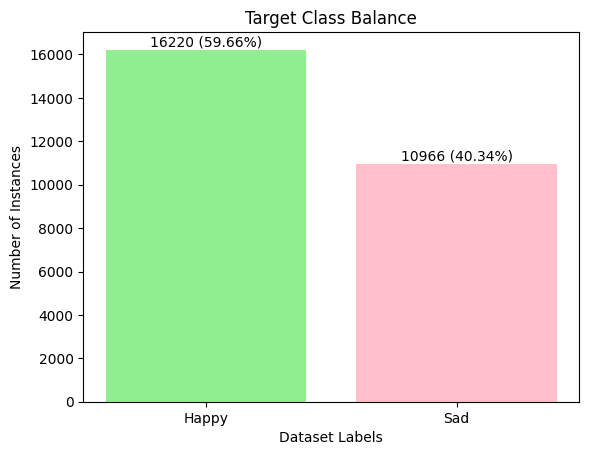

In [12]:
# Plot sampling subset comparison using bar plot
labels = ['Happy','Sad'] 
x_axis = np.arange(len(labels)) 

ax = plt.bar(x_axis, [sum(happy_data), sum(sad_data)], color=['lightgreen','pink'])
  
plt.xticks(x_axis, labels)
plt.xlabel("Dataset Labels") 
plt.ylabel("Number of Instances") 
plt.title("Target Class Balance")

rects = ax.patches
total = sum([rect.get_height() for rect in rects])
for i, value in enumerate(labels):
    bar_height = rects[i].get_height()
    plt.text(i, bar_height, str(bar_height) + f" ({100*(bar_height/total):.2f}%)", ha='center', va='bottom')

plt.show() 

### Part I - a) Interpretation/Analysis

We found __12,045__ total faces with happy or sad emotions.

The dimensions of each face image is __48 * 48__ pixels.

Our binary classes are __slightly imbalanced__ since __40%__ of our data correspond to __sad faces__ and __60%__ to __happy faces__.

[Return to the Table of Contents](#toc)

### Part I - b) PCA and LDA to represent faces <a class="anchor" id="part-1b"></a>

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [13]:
from sklearn.decomposition import PCA

def get_components_from_pca(x, y, n_components=0.8):
    # convert image pixel values (matrix) into an array
    x_fit = [face.flatten() for face in x]

    # fit a PCA with the array values
    pca = PCA(n_components=n_components)
    pca.fit(x_fit)

    # return only the PCA components
    return pca.components_, np.cumsum(pca.explained_variance_ratio_), pca.transform(x_fit)

# get the PCA components from the happy/sad faces
pca_components, _, pca_features = get_components_from_pca(sample_x_train, sample_y_train)

# display: n° of components (31) and 2304 (48*48) pixel values
print("(#instances, #pca components)")
pca_features.shape

(#instances, #pca components)


(12045, 31)

In [14]:
# Show PCA components
pd.DataFrame(pca_features, columns=['PCA Component #' + str(i+1) for i in range(pca_features.shape[1])])

,PCA Component #1,PCA Component #2,PCA Component #3,PCA Component #4,PCA Component #5,PCA Component #6,PCA Component #7,PCA Component #8,PCA Component #9,PCA Component #10,...,PCA Component #22,PCA Component #23,PCA Component #24,PCA Component #25,PCA Component #26,PCA Component #27,PCA Component #28,PCA Component #29,PCA Component #30,PCA Component #31
0,324.797361,855.560194,1285.285256,-1545.369708,558.287293,-304.352789,-954.386595,629.716681,190.392088,345.694062,...,69.955539,-325.835129,178.316164,-80.962375,41.441909,-260.770366,165.208831,-35.832466,-334.512962,-3.282879
1,576.410173,-791.485379,1676.285245,233.349014,803.179014,-149.888491,-676.652957,588.978649,-440.212523,-263.659513,...,-99.260474,-50.863039,48.772479,386.559806,-98.717211,15.139424,-228.858078,194.645858,373.934282,-33.217527
2,-831.281612,-1307.307730,-356.774600,-550.178849,850.700625,51.677318,649.241529,-1118.500484,-205.076795,-146.485220,...,-15.753603,157.921032,-203.158356,-243.564992,-251.485813,79.932529,260.235594,-80.669791,-58.042670,184.916495
3,1876.046526,-2075.655489,-693.360667,181.358025,-63.870201,-47.682902,230.537817,274.030384,53.001440,153.883188,...,-24.841999,92.486422,-58.405038,-36.479049,-154.914528,194.631935,36.523563,19.766537,-5.736305,132.293110
4,-853.068948,-968.733170,-201.021304,1018.565930,-502.478416,461.108259,122.721252,509.976388,-213.197205,-411.593824,...,156.704127,40.091887,-258.243097,196.900075,-122.679470,-82.965774,177.281211,146.678515,293.930547,-224.052473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12040,1113.894498,-863.742940,570.018409,136.132232,376.457437,27.836641,-301.417467,-378.269293,373.484137,9.552716,...,-55.417128,250.083844,-273.720393,-89.092338,-221.704101,170.440687,-36.151265,212.387864,-85.355915,286.352807
12041,1774.605970,-275.731884,-355.098742,-1176.370921,-630.805624,43.874596,248.738068,563.380450,-542.139936,77.197812,...,250.009700,-339.274793,-249.705698,108.097314,172.546945,13.181116,22.019469,-116.094524,-124.305223,119.280521
12042,-2943.477662,615.681740,-753.721935,-1059.056468,729.930726,177.585978,-485.982272,1020.714606,893.287386,-171.882385,...,162.982206,-54.755203,161.036569,-206.964861,349.976089,319.887941,-316.260040,290.778898,-85.994914,435.338357
12043,994.302181,503.836828,1027.278327,-89.784028,-243.267450,107.094781,-443.421776,263.901632,205.748412,366.745791,...,-198.970630,514.863376,-104.391799,-54.962718,1.550649,222.522162,137.655797,-129.854059,-259.396278,-111.543063


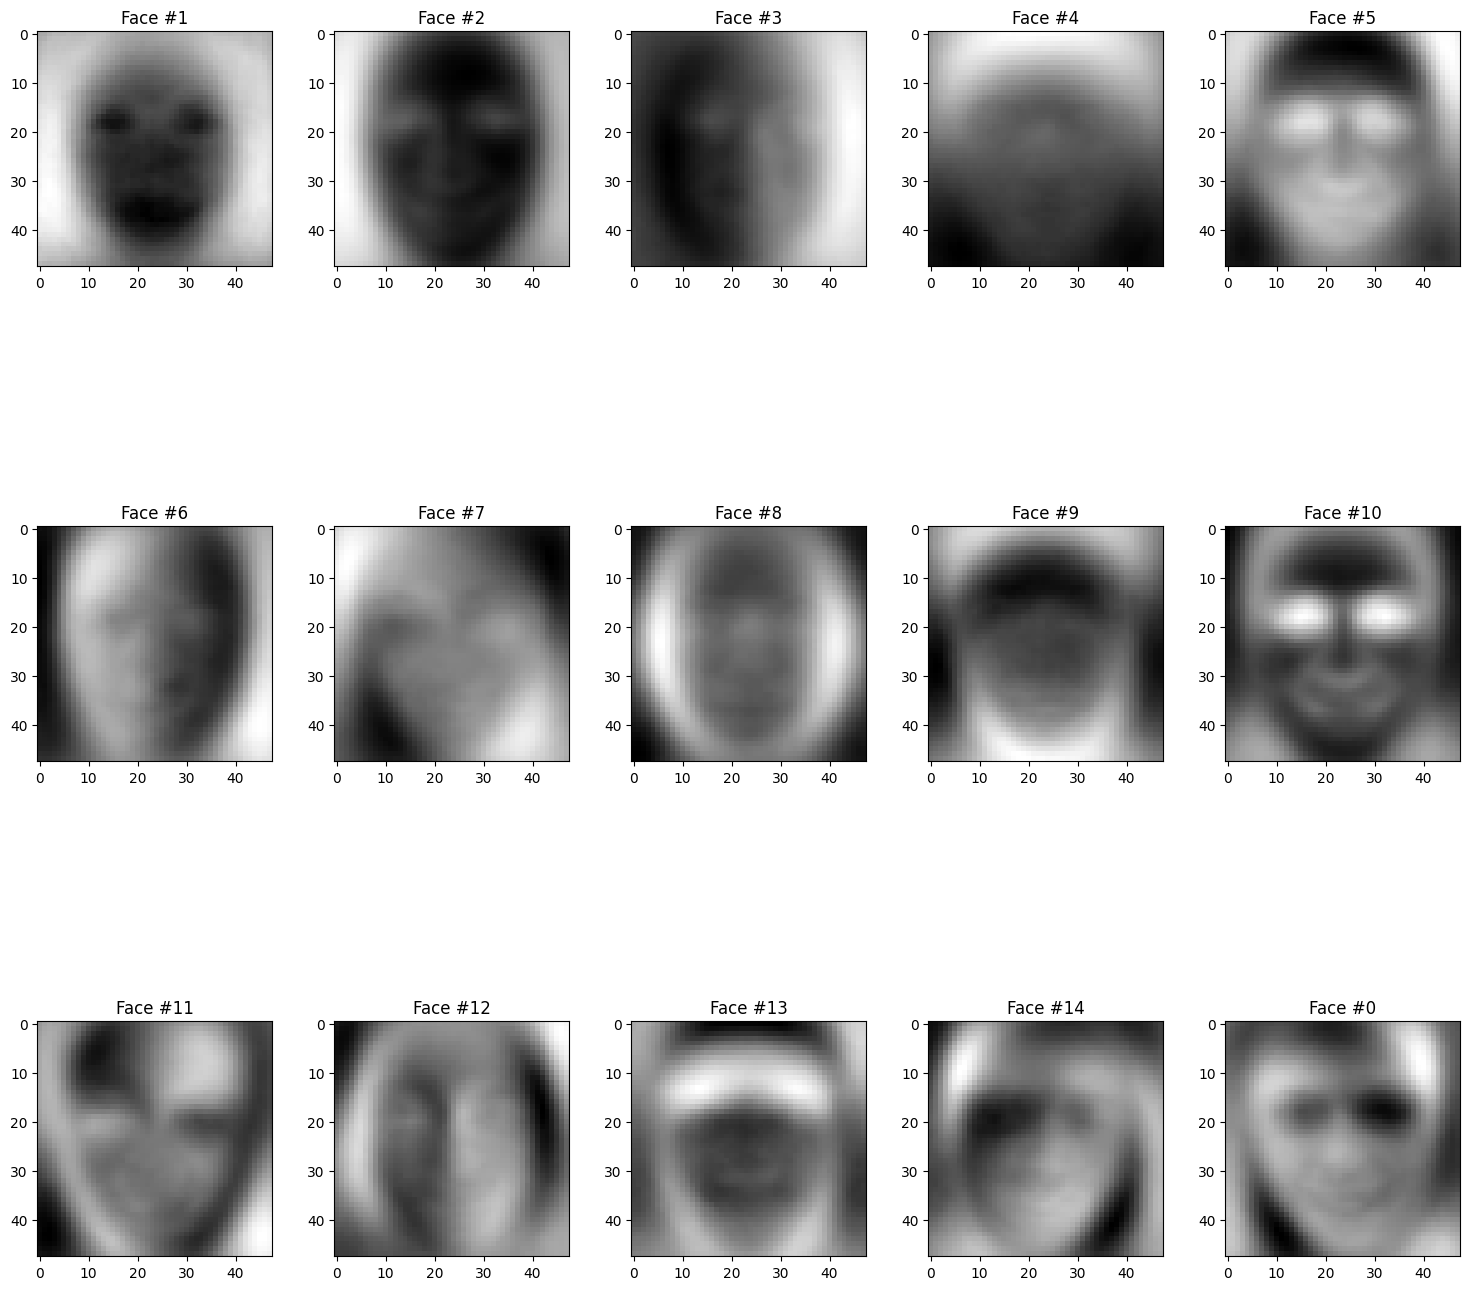

In [20]:
import math

def represent_face_using_pca(components, n_component, rows_cols, image_dimensions=(48, 48), cmap="gray"):
    
    # given the PCA components, display the image into the desired subplot
    plt.title(f"Face #{n_component}")
    plt.subplot(rows_cols[0], rows_cols[1], n_component+1)
    plt.imshow(components[n_component].reshape(image_dimensions), cmap=cmap)

def represent_x_faces_using_pca(components, x, image_dimensions=(48, 48), cmap="gray", faces_per_row=5, subplots_size=(15,15)):

    # set the row and column of the subplot to be drawn
    cols = min(x, faces_per_row)
    rows = math.ceil(x / faces_per_row)

    # set the layout of the subplots
    fig, axs = plt.subplots(rows, cols, figsize=subplots_size)
    fig.tight_layout()

    # representing X number of different faces using PCA on each subplot
    for i in range(x):
        represent_face_using_pca(components, i, rows_cols=(rows, cols), image_dimensions=image_dimensions, cmap=cmap)
    plt.show()

# show 15 faces using the PCA components
represent_x_faces_using_pca(pca_components, x = 15)

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def get_components_from_lda(x, y, n_components=0.8):

    # apply PCA on our dataset first before proceeding to LDA
    pca = PCA(n_components=n_components)
    x_fit = [x_instance.flatten() for x_instance in x]
    x_pca = pca.fit_transform(x_fit)

    # apply LDA on top of the PCA components, use eigen solver (Eigenvalue decomposition)
    # so that we are able to represent the face
    lda = LDA(solver='eigen')
    x_lda = lda.fit_transform(x_pca, y)

    # return the PCA model and LDA components
    lda_components = lda.scalings_.T
    return pca, lda_components

# get LDA components
pca, lda_components = get_components_from_lda(sample_x_train, sample_y_train)
lda_components.shape

(31, 31)

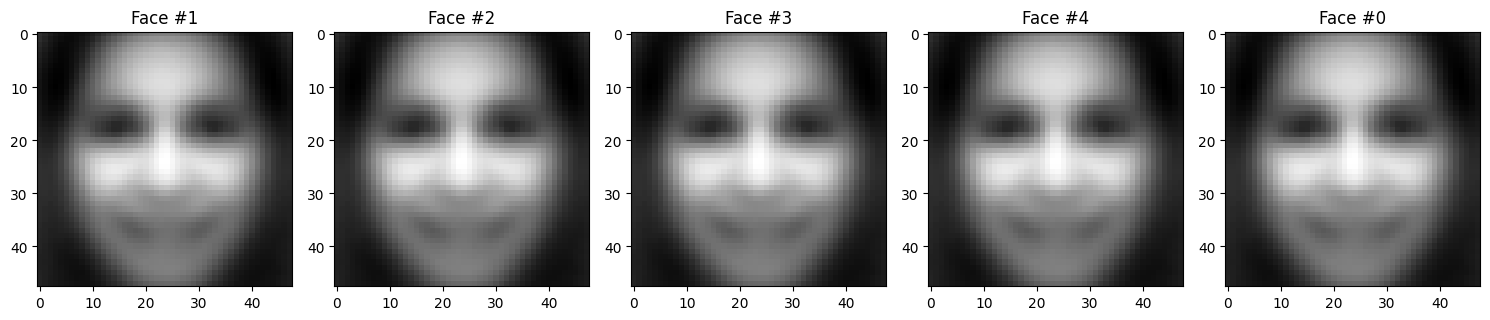

In [21]:
def represent_face_using_lda(faces, n_face, rows_cols, image_dimensions=(48, 48), cmap="gray"):
    
    # given the LDA components, display the image into the desired subplot
    plt.title(f"Face #{n_face}")
    plt.subplot(rows_cols[0], rows_cols[1], n_face+1)
    plt.imshow(faces[n_face].reshape(image_dimensions), cmap=cmap)

def represent_x_faces_using_lda(faces, x, image_dimensions=(48, 48), cmap="gray", faces_per_row=5, subplots_size=(15,15)):

    # set the row and column of the subplot to be drawn
    cols = min(x, faces_per_row)
    rows = math.ceil(x / faces_per_row)
    
    # set the layout of the subplots
    fig, axs = plt.subplots(rows, cols, figsize=subplots_size)
    
    # represent X number of different faces using LDA on each subplot
    for i in range(x):
        represent_face_using_lda(faces, i, rows_cols=(rows, cols), image_dimensions=image_dimensions, cmap=cmap)
    
    fig.tight_layout()
    plt.show()

# represent 5 faces using LDA
faces = pca.inverse_transform(lda_components)
represent_x_faces_using_lda(faces, x = 5)

### Part I - b) Interpretation/Analysis

After __applying PCA__ on our happy/sad faces dataset we got 31 components.

These 31 components were used to __plot 15 PCA face representations__.

We also __applied LDA on 5 faces__ and got 1 component (n° of classes - 1).

However, LDA results were not significantly visible when plotting the representions.

[Return to the Table of Contents](#toc)

### Part I - c) Naive Bayes classification <a class="anchor" id="part-1c"></a>

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [10]:
def flatten_image_dataset(dataset):

    # convert an image dataset into a single dimension per image (flatten images into an array)
    return np.array([list(instance.flatten()) for instance in dataset])

# flatten all subsets to process them later
x_train = flatten_image_dataset(sample_x_train)
y_train = flatten_image_dataset(sample_y_train).ravel()
x_test = flatten_image_dataset(sample_x_test)
y_test = flatten_image_dataset(sample_y_test).ravel()

# display: (number of instances, independant features = 2304 = 48*48 pixel resolution)
print("(#instances, #features 48*48):")
x_test.shape

(#instances, #features 48*48):


(1548, 2304)

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

# function to train a model
def train_model(model, x_train, y_train, x_test):
    model_fitted = model.fit(x_train, y_train)
    display(model_fitted)
    y_pred_train = model_fitted.predict(x_train)
    y_pred_test = model_fitted.predict(x_test)
    return y_pred_train, y_pred_test

# function to display the classification model metrics
def display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test, average='binary'):
    print(f"Acuracy Score - Train Subset: {accuracy_score(y_train, y_pred_train)*100:.2f}%")
    print(f"Acuracy Score - Test Subset: {accuracy_score(y_test, y_pred_test)*100:.2f}%")
    print(f"F1 Score - Train Subset: {f1_score(y_train, y_pred_train, average=average):.4f}")
    print(f"F1 Score - Test Subset: {f1_score(y_test, y_pred_test, average=average):.4f}", end='\n\n')

# use Naive Bayes to classify sad and happy faces
gnb = GaussianNB()
y_pred_train, y_pred_test = train_model(gnb, x_train, y_train, x_test)
display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)

GaussianNB()

Acuracy Score - Train Subset: 60.12%
Acuracy Score - Test Subset: 59.04%
F1 Score - Train Subset: 0.6640
F1 Score - Test Subset: 0.6470



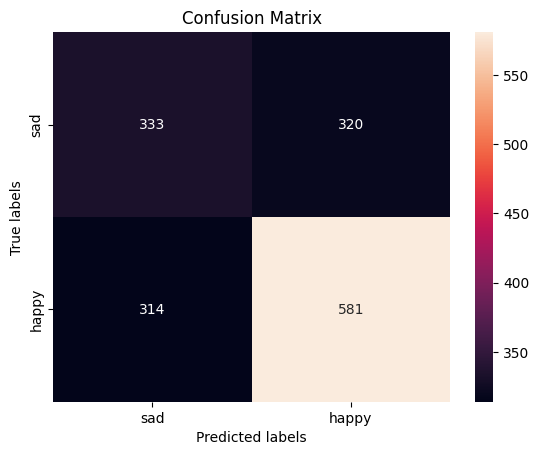

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# function to plot a confusion matrix based on prediction results
def plot_confusion_matrix(y_test, y_pred_test, labels=[]):
    # set the confusion matrix
    matrix = confusion_matrix(y_test, y_pred_test)
    df = pd.DataFrame(matrix, columns=labels)
    df.index = labels
    
    # plot the heatmap and set labels
    sns.heatmap(df, annot=True, fmt="d")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred_test, labels=['sad', 'happy'])

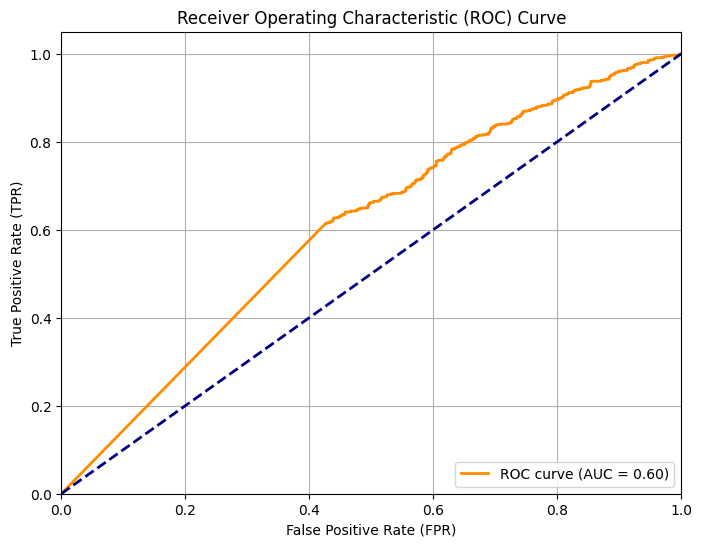

In [13]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_probs):
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# get the probability of predictions from the Naive Bayes classifier
y_probs = gnb.predict_proba(x_test)[:, 1]

# plot the ROC curve for the NB classifier
plot_roc_curve(y_test, y_probs)

### Part I - c) Interpretation/Analysis

After __applying Naive Bayes classification__ on the happy/sad faces, we get an aproximate __60% accuracy__ on the predictions.

The __confusion matrix__ shows how our model can predict most happy faces but is mostly __struggling to classify sad faces__.

Both training and test accuracies are low, which indicates an __underfitted__ machine learning model.

[Return to the Table of Contents](#toc)

### Part I - d) Logistic Regression classification <a class="anchor" id="part-1d"></a>

[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

LogisticRegression()

Acuracy Score - Train Subset: 74.69%
Acuracy Score - Test Subset: 69.38%
F1 Score - Train Subset: 0.7996
F1 Score - Test Subset: 0.7541



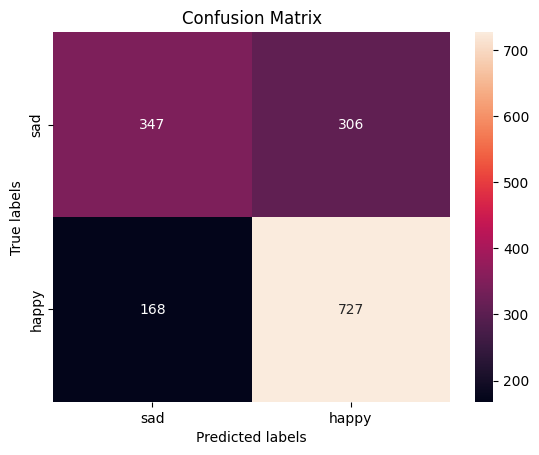

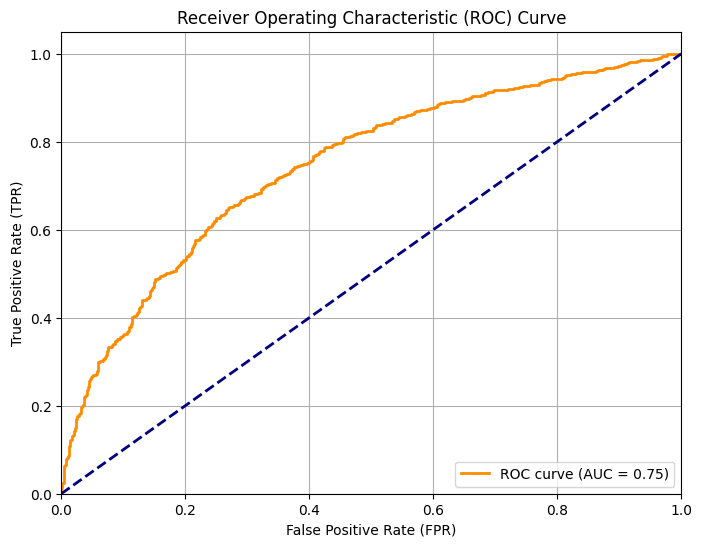

In [14]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# use LogisticRegression to classify sad and happy faces
lr = LogisticRegression()
y_pred_train, y_pred_test = train_model(lr, x_train, y_train, x_test)
display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)
plot_confusion_matrix(y_test, y_pred_test, labels=['sad', 'happy'])

# get the probability of predictions from the Logistic Regression classifier
y_probs = lr.predict_proba(x_test)[:, 1]

# plot the ROC curve for the LR classifier
plot_roc_curve(y_test, y_probs)

### Part I - d) Interpretation/Analysis

When using __Logistic Regression__ to classify on the happy/sad faces, we get an aproximate __70% accuracy__ on the predictions.

This is a much more improvement from the previous Naive Bayes algorithm.

The __confusion matrix__ shows that our model still __struggles to classify sad faces__ correctly.

There is a __5% difference__ between training and testing accuracy, indicating an __slightly overfitted__ machine learning model.

[Return to the Table of Contents](#toc)

### Part I - e) Support Vector Machine classification <a class="anchor" id="part-1e"></a>

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

SVC(probability=True)

Acuracy Score - Train Subset: 86.10%
Acuracy Score - Test Subset: 73.58%
F1 Score - Train Subset: 0.8878
F1 Score - Test Subset: 0.7833



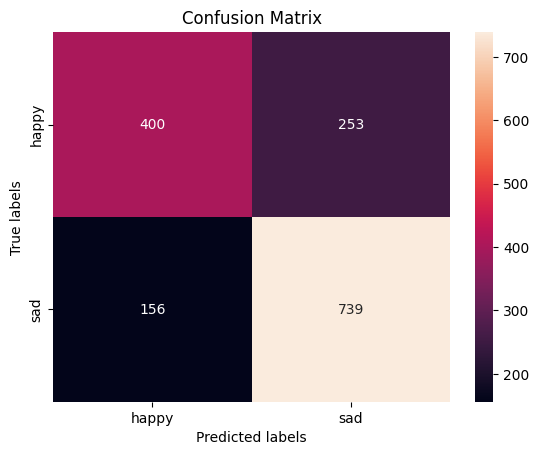

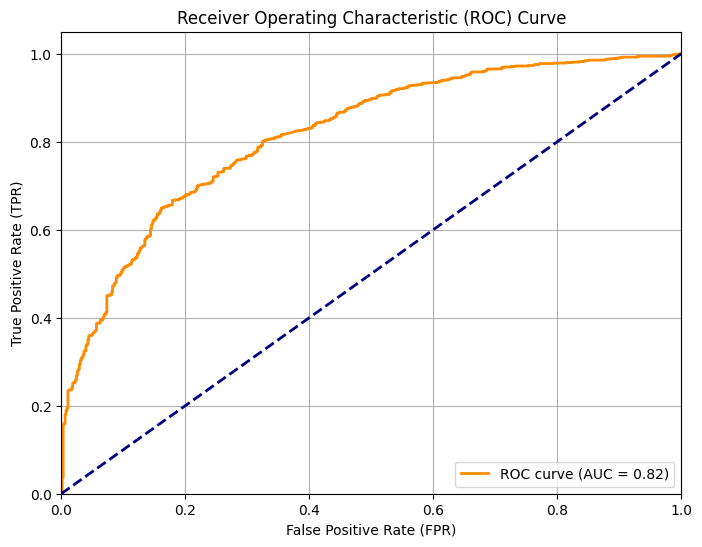

In [61]:
from sklearn.svm import SVC

# use Support Vector Machine to classify sad and happy faces
svm = SVC(probability=True)
y_pred_train, y_pred_test = train_model(svm, x_train, y_train, x_test)
display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)
plot_confusion_matrix(y_test, y_pred_test, labels=['happy', 'sad'])

# get the probability of predictions from the Logistic Regression classifier
y_probs = svm.predict_proba(x_test)[:, 1]

# plot the ROC curve for the LR classifier
plot_roc_curve(y_test, y_probs)

In [35]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(model, param_grid, x_train, x_test, y_train, y_test):
    # instantiate grid search cross validation and fit it with training data
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
 
    # print best hyperparameters and accuracy score found
    model_name = type(model).__name__ # extract the model name
    print("Model:", model_name)
    print("Best Hyperparameters: ", grid_search.best_params_)
    print("Best Accuracy Score: {:.2f} %".format(grid_search.best_score_ * 100))
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(x_test, y_test)
    print("Test Accuracy Score: {:.2f} %".format(test_accuracy * 100))
    
    # return the best model
    return best_model

# define grid search
param_grid = {"C": [10, 1, 0.1], "kernel": ['rbf', 'sigmoid']}
best_svm = SVC()
best_svm = hyperparameter_tuning(best_svm, param_grid, x_train, x_test, y_train, y_test)
best_svm

Model: SVC
Best Hyperparameters:  {'C': 10, 'kernel': 'rbf'}
Best Accuracy Score: 75.18 %
Test Accuracy Score: 74.81 %


SVC(C=10)

### Part I - e) Interpretation/Analysis

The __Support Vector Machine__ model presents the __best accuracy score__ for both test and train subsets.

We used __GridSearch Cross Validation__ for __hyperparameter tuning__.

The resulting __best parameters__ are:

- C = 10 (determines how many data samples are allowed to be placed in different classes)
- Kernel = rbf (Radial Basis Function)

There is a __< 1% difference__ between test and train accuracies, which demonstrates that our model is __NOT overfitted__.

[Return to the Table of Contents](#toc)

### Part I - f) Question To Answer <a class="anchor" id="part-1f"></a>

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

### Part I - f) Discussion and Results Plot

Using __Support Vector Machine__ (SVM) shows a more __reliable classification__ of happy and sad faces due to its model accuracy, F1 score and nearly balanced classes.
- Train Accuracy Score: 75.18 %
- Test Accuracy Score: 74.81 %

Our __classification performance per each class__:
- __Happy faces classified correctly__ = TP / (TP + FP) = 739 / (739 + 156) = __82.57%__
- __Sad faces classified correctly__   = TN / (TN + FN) = 400 / (400 + 253) = __61.26%__

*TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives*

__SVM__ works best on classifying our dataset because of the__following reasons__:
- It creates a clear __margin of separation between 2 classes__
- SVM is more __effective in high dimensional spaces__. In this case we are using image resolution as features, which creates 2,304 features, hence a high dimensional space.
- Our binary __classes are balanced__.

[Return to the Table of Contents](#toc)

when classes not balanced accuracy is not good measure

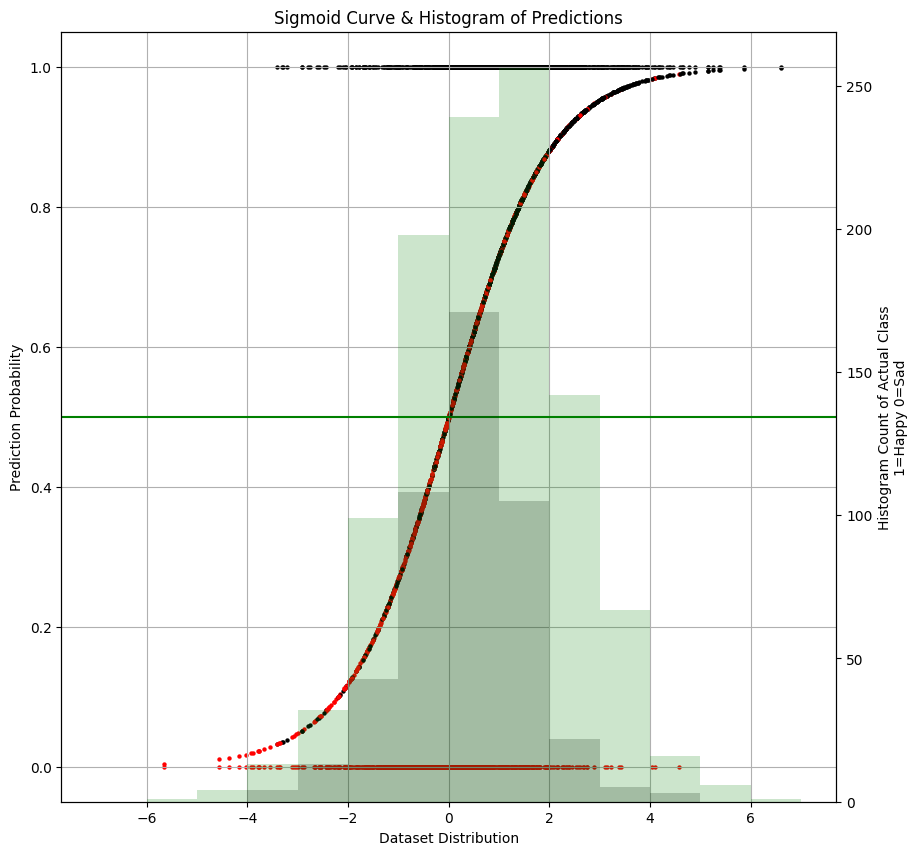

In [15]:
# get the prediction probabilities
y_test_predict_probas = lr.predict_proba(x_test)[:,1]

# get thetas and intercepto from the model
thetas = lr.coef_[0]
intercept = lr.intercept_[0]
intercept_and_thetas = np.append([intercept], thetas)
x_test_with_theta_zero = [np.append([1], row) for row in x_test]

# calculate the dot products to plot the sigmoid
dot_product_result = [np.dot(x, intercept_and_thetas) for idx, x in enumerate(x_test_with_theta_zero)]
fig, ax1 = plt.subplots()

# build the actual sigmoid plot
sad_faces_dot_products = []
happy_faces_dot_products = []
for idx in range(0,len(dot_product_result)):

    # plot prediction probabilities on top of sigmoid plot
    color = 'black' if y_test[idx] == 1 else 'red'
    ax1.scatter(dot_product_result[idx], y_test_predict_probas[idx], c=[color], s=10, linewidths=0.0)
    
    # plot the actual predictions
    ax1.scatter(dot_product_result[idx], y_test[idx], c=[color], s=10, linewidths=0.0)

    # save data for histograms
    if (y_test[idx] == 1 and y_test_predict_probas[idx] < 0.5) or (y_test[idx] != 1 and y_test_predict_probas[idx] > 0.5):
        sad_faces_dot_products.append(dot_product_result[idx])
    if (y_test[idx] == 1 and y_test_predict_probas[idx] > 0.5) or (y_test[idx] != 1 and y_test_predict_probas[idx] < 0.5):
        happy_faces_dot_products.append(dot_product_result[idx])        

# set plot labels and limits
plt.ylim([-0.05, 1.05])
plt.axhline(y = 0.5, color = 'green', linestyle = '-')
plt.xlabel('Dataset Distribution')
plt.grid(which="major", axis='both', markevery=0.10)
plt.ylabel('Prediction Probability')
plt.title('Sigmoid Curve & Histogram of Predictions')

# add a histogram to show where the correct/incorrect prediction distributions
ax2 = ax1.twinx()
ax2.hist(sad_faces_dot_products, bins=[-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7], color="black", alpha=0.2)
ax2.hist(happy_faces_dot_products, bins=[-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7], color="green", alpha=0.2)
ax2.set_ylabel('Histogram Count of Actual Class\n1=Happy 0=Sad')
ax2.set_xlabel('')
ax2.set_title('')

# set plot size
fig.set_figwidth(10)
fig.set_figheight(10)
plt.show()    

### Part I - g) Showing 5 happiest and saddest faces <a class="anchor" id="part-1g"></a>

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [155]:
def get_top_n_faces(model, n, x_test, y_test, class_num, image_dimensions=(48,48), cmap='gray'):
    # get the decision scores from our best SVM model using the test subset
    decision_scores = model.decision_function(x_test)

    # get the class indexes and scores from the test subset
    class_indexes = np.where(y_test == class_num)[0]
    class_scores = decision_scores[class_indexes]

    # using argpartition (numpy method) get the top N faces with the highest decision scores for the given class
    top_n_faces = np.argpartition(class_scores, -n)[-n:]
    top_n_faces_indexes = class_indexes[top_n_faces]

    # set the layout of the subplots
    fig, axs = plt.subplots(1, n, figsize=(15,15))

    # get prediction probabilities
    predict_probas = model.predict_proba(x_test)[:,1]
    
    # display the top N faces for the given class
    for i, index in enumerate(top_n_faces_indexes):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(x_test[index].reshape(image_dimensions), cmap=cmap)
        ax.set_title(f"Prediction proability: {100*predict_probas[index]:.2f}%")
    
    fig.tight_layout()
    plt.show()

TOP 5 SADDEST FACES


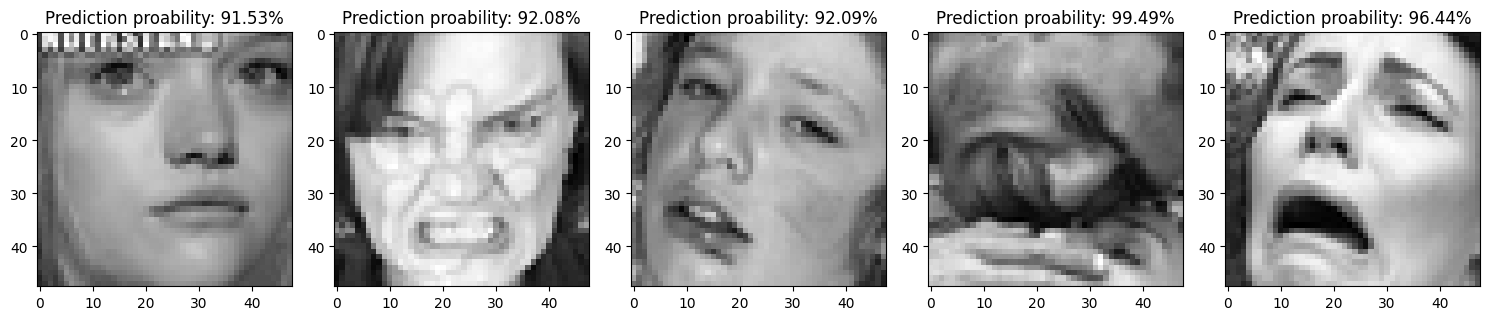

In [156]:
# show the 5 saddest faces
print('TOP 5 SADDEST FACES')
get_top_n_faces(svm, 5, x_test, y_test, 0)

TOP 5 HAPPIEST FACES


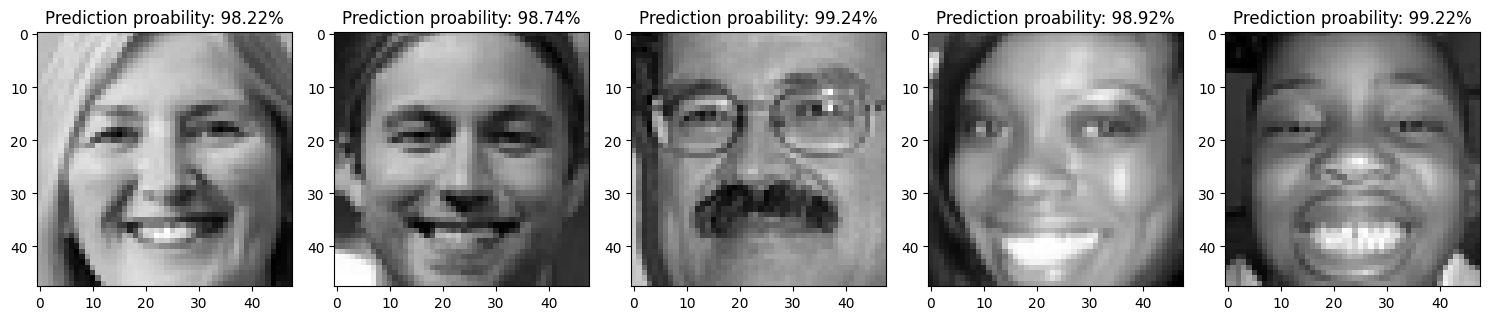

In [157]:
# show the 5 happiest faces
print('TOP 5 HAPPIEST FACES')
get_top_n_faces(svm, 5, x_test, y_test, 1)

### Part I - g) Interpretation/Analysis

We were able to __show the happiest and saddest faces__ (5 of each) by measuring the prediction probabilities for the SVM classifier on each instance.

To __measure the classifications__ we used the decision function method, which gives us the __decision scores__, and the prediction probabilities.

The results show how __strong emotions positively correlated__ to the __high prediction probabilities__.

[Return to the Table of Contents](#toc)

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

### <a class="anchor" id="part-2a"></a> Part II - a) Applying PCA and LDA and plotting cumulative variance of binary vs multiclass principal components 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [26]:
# sample dataset to include only happy or sad faces
binary_x_train, binary_y_train = sample_dataset(x_training, y_training, ['happy', 'sad'])
binary_x_test, binary_y_test = sample_dataset(x_testing, y_testing, ['happy', 'sad'])

# sample dataset using all emotions, just to convert 7 target features into 1 unique target feature with 7 classes
ALL_EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
multi_x_train, multi_y_train = sample_dataset(x_training, y_training, ALL_EMOTIONS)
multi_x_test, multi_y_test = sample_dataset(x_testing, y_testing, ALL_EMOTIONS)

# display: (number of happy or sad faces, image dimensions)
print('(# binary instances happy or sad, image dimensions)')
display(binary_x_train.shape)

# display: (number of total faces for multiclass, image dimensions)
print('\n(# multiclass instances all emotions, image dimensions)')
display(multi_x_train.shape)

(# binary instances happy or sad, image dimensions)


(12045, 48, 48)


(# multiclass instances all emotions, image dimensions)


(28709, 48, 48)

In [27]:
# get the PCA components from the happy/sad faces
pca_components_binary, cummulative_variance_binary, pca_features_binary = get_components_from_pca(binary_x_train, binary_y_train)

In [28]:
# get the PCA components from the multiple classes
pca_components_multi, cummulative_variance_multi, pca_features_multi = get_components_from_pca(multi_x_train, multi_y_train, n_components=0.95)

In [29]:
# Show PCA components for multiclass classification
pd.DataFrame(pca_features_multi, columns=['PCA Component (multi) #' + str(i+1) for i in range(pca_features_multi.shape[1])])

,PCA Component (multi) #1,PCA Component (multi) #2,PCA Component (multi) #3,PCA Component (multi) #4,PCA Component (multi) #5,PCA Component (multi) #6,PCA Component (multi) #7,PCA Component (multi) #8,PCA Component (multi) #9,PCA Component (multi) #10,...,PCA Component (multi) #244,PCA Component (multi) #245,PCA Component (multi) #246,PCA Component (multi) #247,PCA Component (multi) #248,PCA Component (multi) #249,PCA Component (multi) #250,PCA Component (multi) #251,PCA Component (multi) #252,PCA Component (multi) #253
0,-692.914983,-345.227767,-905.223688,383.049081,511.841854,-122.413279,105.177863,-37.062698,-91.102928,-152.977381,...,60.935889,-64.923041,-30.675767,20.518955,-38.011819,-70.159102,21.737971,-27.731935,4.648263,12.928659
1,55.912943,498.918743,625.859351,451.000298,691.654137,-66.912200,486.758703,149.807826,90.976342,-194.603880,...,19.398642,45.011981,7.522500,106.686983,-77.394233,-88.087092,31.414396,19.558706,-33.577068,7.215020
2,1326.436132,-213.907520,-1958.267094,-288.200068,816.806497,916.421790,-1129.828430,267.467645,300.720984,89.324387,...,-20.294088,9.878738,-23.733819,-19.490151,-15.289932,26.814415,63.351103,21.196868,-38.830419,-12.154825
3,223.911166,497.956506,1487.658269,-1409.174164,-735.911160,-5.884714,-959.610459,-677.360503,259.942580,267.815900,...,-39.707558,14.210880,-83.919753,-77.955145,-32.018336,-80.448959,55.645505,-24.871903,63.473896,31.321659
4,-1799.973051,-2029.922827,85.197644,-14.782284,342.298141,684.188810,-83.067698,32.221313,-352.031029,-569.377344,...,-10.534837,-37.563124,52.051959,2.101844,-12.544969,17.651568,-10.957526,-29.875623,8.299171,-50.310598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,-539.410346,339.851673,-565.371921,119.660642,89.041615,-1008.062884,152.276030,13.247446,-341.088279,257.363669,...,-47.759143,-108.800733,-16.389601,-39.904916,-12.994971,-71.163495,-11.410112,11.391881,-5.538261,19.071242
28705,-564.359537,151.710598,207.703417,640.572784,614.492088,-384.663781,707.357652,-62.906700,-424.212453,685.063914,...,49.882517,-12.511904,43.936891,42.222895,28.502117,-17.037294,0.225656,37.717141,15.636849,-40.720806
28706,845.846003,129.134475,1110.508277,-3.820307,206.181814,-181.637201,-417.691156,-435.193463,330.007902,199.829900,...,-4.671916,77.893172,-50.035807,6.999705,-70.043541,-39.176111,-2.559976,-19.415424,-52.517808,-16.654746
28707,509.395755,324.180051,471.680275,238.639556,79.893469,271.676871,198.322995,550.764858,8.050414,-178.827726,...,36.453952,9.873726,19.079005,73.383808,-53.276879,-21.328817,-2.880427,11.225575,-16.817878,44.001325


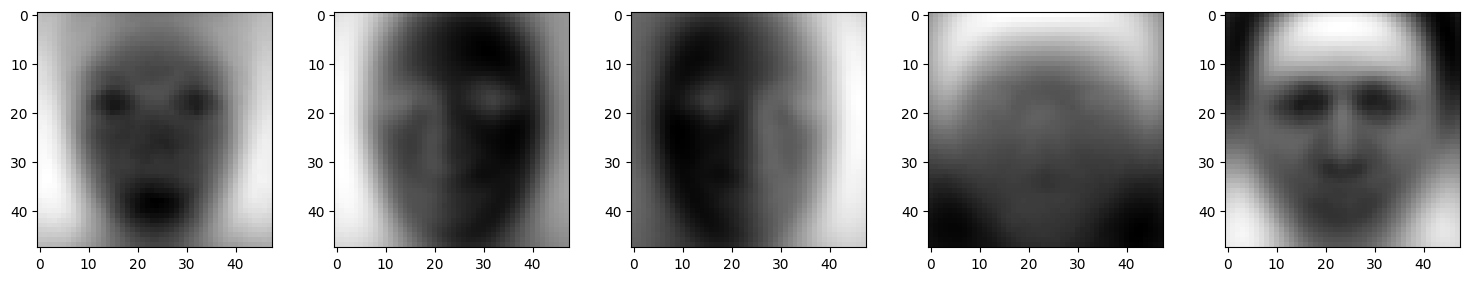

In [30]:
# represent 5 faces using PCA components using the multi-class dataset
represent_x_faces_using_pca(pca_components_multi, x = 5)

In [31]:
# apply LDA on the multi-class dataset
pca_multi, lda_components_multi = get_components_from_lda(multi_x_train, multi_y_train)
lda_components_multi.shape

(32, 32)

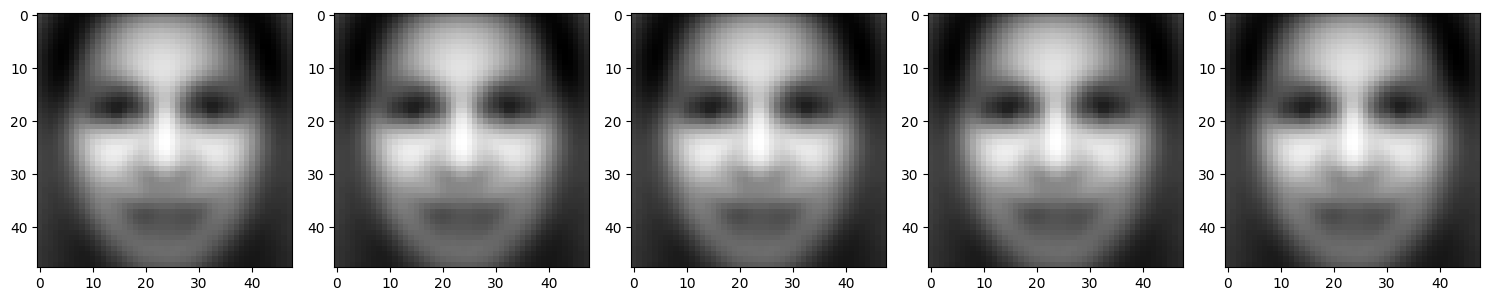

In [32]:
# represent 5 faces using LDA components using the multi-class dataset
faces_multi= pca_multi.inverse_transform(lda_components_multi)
represent_x_faces_using_lda(faces_multi, x = 5)

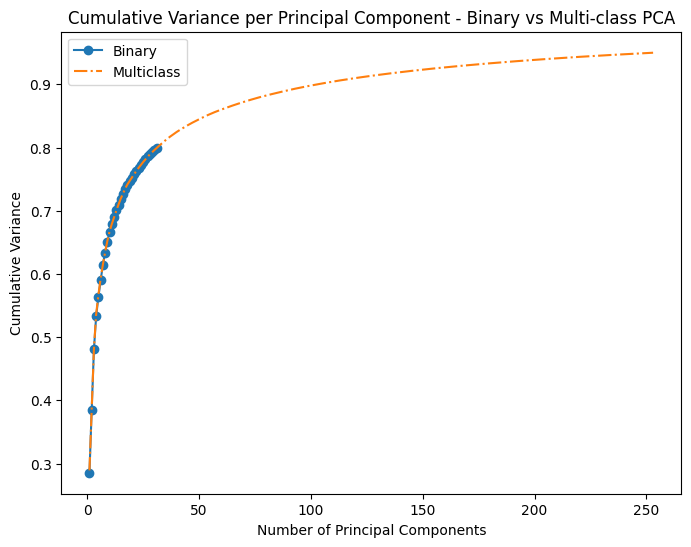

In [34]:
# plot cumulative variance of the PCA components of binary vs multiclass classification
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(cummulative_variance_binary) + 1), cummulative_variance_binary, label= 'Binary class', marker='o')
plt.plot(np.arange(1, len(cummulative_variance_multi) + 1), cummulative_variance_multi, label= 'Multi class', linestyle='-.')
plt.title('Cumulative Variance per Principal Component - Binary vs Multi-class PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.legend(['Binary', 'Multiclass'])
plt.show()

### Part II - a) Interpretation/Analysis

The graphic shows how our the **cumulative variance keeps adding up for each component until it approaches to 1**.

However when comparing **binary vs multiclass**, the number of components on the binary class stops at 31 with a variance of approximately 0.8, while the number of components of multiclass is over 250 components.

**Each new component adds less variance over time, the latest components add little cumulative variance.**

[Return to the Table of Contents](#toc)

### Part II - b) Naive Bayes multiclass classification <a class="anchor" id="part-2b"></a>

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [35]:
# function to label encode the target feature, converting 7 target features into 1 target with 7 classes
def pre_process_target_feature(y_dataset):
    y_processed = []
    for i, y_instance in enumerate(y_dataset):
        y_processed.append(list(y_instance).index(1))
    return np.array(y_processed)

# flatten all subsets to process them later
multi_x_train = flatten_image_dataset(x_training)
multi_y_train = pre_process_target_feature(y_training)
multi_x_test = flatten_image_dataset(x_testing)
multi_y_test = pre_process_target_feature(y_testing)

# display (number of instances, number of independant features)
print('(# instances multiclass all emotions, image dimensions 48*48=2304)')
multi_x_train.shape

(# instances multiclass all emotions, image dimensions 48*48=2304)


(28709, 2304)

In [36]:
# display unique values of our target feature
np.unique(multi_y_train)

array([0, 1, 2, 3, 4, 5, 6])

GaussianNB()

Acuracy Score - Train Subset: 22.24%
Acuracy Score - Test Subset: 22.74%
F1 Score - Train Subset: 0.2041
F1 Score - Test Subset: 0.2069



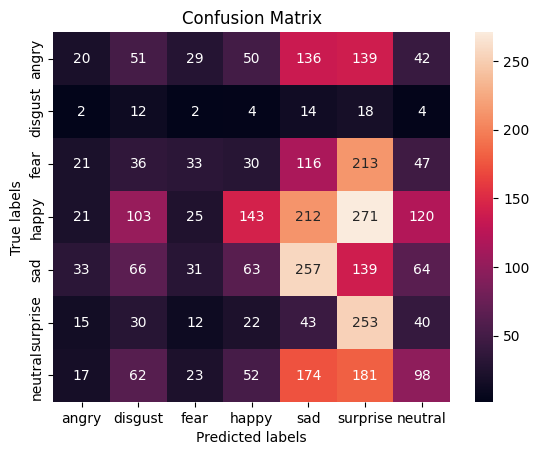

              precision    recall  f1-score   support

       angry       0.16      0.04      0.07       467
     disgust       0.03      0.21      0.06        56
        fear       0.21      0.07      0.10       496
       happy       0.39      0.16      0.23       895
         sad       0.27      0.39      0.32       653
    surprise       0.21      0.61      0.31       415
     neutral       0.24      0.16      0.19       607

    accuracy                           0.23      3589
   macro avg       0.22      0.24      0.18      3589
weighted avg       0.26      0.23      0.21      3589



In [37]:
# use Naive Bayes to classify 7 classes of emotions
from sklearn.metrics import classification_report

gnb_multi = GaussianNB()
multi_y_train_pred, multi_y_test_pred = train_model(gnb_multi, multi_x_train, multi_y_train, multi_x_test)
display_classifier_metrics(multi_y_train, multi_y_train_pred, multi_y_test, multi_y_test_pred, average='weighted')
plot_confusion_matrix(multi_y_test, multi_y_test_pred, labels=ALL_EMOTIONS)
print(classification_report(multi_y_test, multi_y_test_pred, target_names=ALL_EMOTIONS))

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

### Part II - b) Interpretation/Analysis

After __applying Naive Bayes classification__ for multiclass classification, we get an overall 22% accuracy on succesful predictions.

However, __accuracy won't tell us much about our multiclass classifier performance__. Let's deep dive on our multiclass classifier performance by checking the following:

- **Confusion Matrix**: The values along the diagonal (e.g., 20 for Angry, 12 for Disgust, ..., 98 for surprise) represent the number of correct predictions (True positives) for each class. Higher values indicate better performance for that class. The __confusion matrix__ shows how heavy **Off-Diagonal Values** indicating missclassifications (False Positives and Negatives) __struggling to classify most of the labels__.

- **Class Imbalance**: The matrix shows that some classes, like "Happy" and "Sad," have significantly more instances than others, which __affects the model's performance__.

- **F1 Score for test set**: F1 Score is a useful metric to measure the __performance of classifications when having imbalaced data.__ This metric shows a __value of 0.20__ which is very low. Hence __our NB classifier did not performed well__.

[Return to the Table of Contents](#toc)

### Part II - c) Logistic Regression multiclass classification <a class="anchor" id="part-2c"></a>

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

LogisticRegression(multi_class='multinomial')

Acuracy Score - Train Subset: 38.39%
Acuracy Score - Test Subset: 37.09%
F1 Score - Train Subset: 0.3555
F1 Score - Test Subset: 0.3405



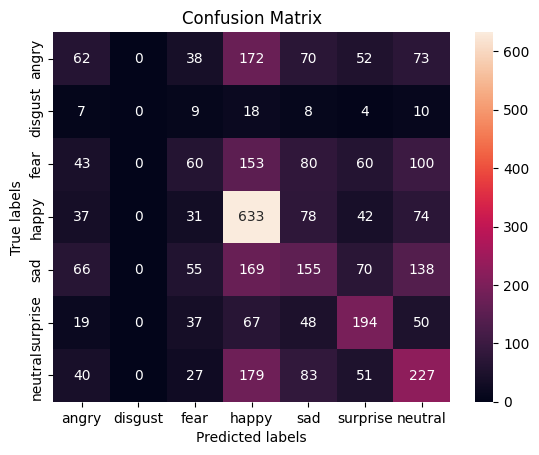

              precision    recall  f1-score   support

       angry       0.23      0.13      0.17       467
     disgust       0.00      0.00      0.00        56
        fear       0.23      0.12      0.16       496
       happy       0.46      0.71      0.55       895
         sad       0.30      0.24      0.26       653
    surprise       0.41      0.47      0.44       415
     neutral       0.34      0.37      0.35       607

    accuracy                           0.37      3589
   macro avg       0.28      0.29      0.28      3589
weighted avg       0.33      0.37      0.34      3589



In [38]:
# use LogisticRegression to classify multiple classes, display metrics and plot confussion matrix
lr_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_y_train_pred, multi_y_test_pred = train_model(lr_multi, multi_x_train, multi_y_train, multi_x_test)
display_classifier_metrics(multi_y_train, multi_y_train_pred, multi_y_test, multi_y_test_pred, average='weighted')
plot_confusion_matrix(multi_y_test, multi_y_test_pred, labels=ALL_EMOTIONS)
print(classification_report(multi_y_test, multi_y_test_pred, target_names=ALL_EMOTIONS))

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

### Part II - c) Interpretation/Analysis

After __applying a Logistic Regression classifier__ for multiclass classification, we get an overall 37% accuracy on succesful predictions. This is an improvement from the Naive Bayes classifier.

However, __accuracy won't tell us much about our multiclass classification performance__. Let's deep dive on our performance by checking the following:

- **Confusion Matrix**: The values along the diagonal (e.g., 62 for Angry, 0 for Disgust, ..., 227 for neutral) represent the number of correct predictions for each class. This time the __confusion matrix__ shows **less Off-Diagonal Values** indicating missclassifications (False Positives and Negatives) __an improvement from the previous classifier but still struggling to classify less populated classes__.

- **Class Imbalance**: The matrix shows that some classes, like "Happy" and "Sad," have significantly more instances than others, which __affects the model's performance__. Classes like **'angry', 'disgust' and 'fear'** have worst results **(more missclassifications) than the Naive Bayes classifier**.
 
- **F1 Score for test set**: F1 Score is a useful metric to measure the __performance of classifications when having imbalaced data.__ This metric shows a __value of 0.34__ which is very low. Hence __our Logistic Regression classifier did not performed well__.

[Return to the Table of Contents](#toc)

### Part II - d) Support Vector Machine multiclass classification <a class="anchor" id="part-2d"></a>

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [41]:
# Small block of code for using only a percentage of the dataset if required
# This is due to the time complexity of SVM algorithm and our limited resources available
percentage = 100
total_instances_train = multi_x_train.shape[0]
instances_train = int((percentage / 100) * total_instances_train)
print(f'#Instances for training: {instances_train}')
total_instances_test = multi_x_test.shape[0]
instances_test = int((percentage / 100) * total_instances_test)
print(f'#Instances for testing: {instances_test}')
x_train = multi_x_train[:instances_train]
x_test = multi_x_test[:instances_test]
y_train = multi_y_train[:instances_train]
y_test = multi_y_test[:instances_test]
print(f'We ended up using {percentage}% of the dataset')

#Instances for training: 28709
#Instances for testing: 3589
We ended up using 100% of the dataset


SVC(probability=True)

Acuracy Score - Train Subset: 61.77%
Acuracy Score - Test Subset: 44.66%
F1 Score - Train Subset: 0.6066
F1 Score - Test Subset: 0.4284



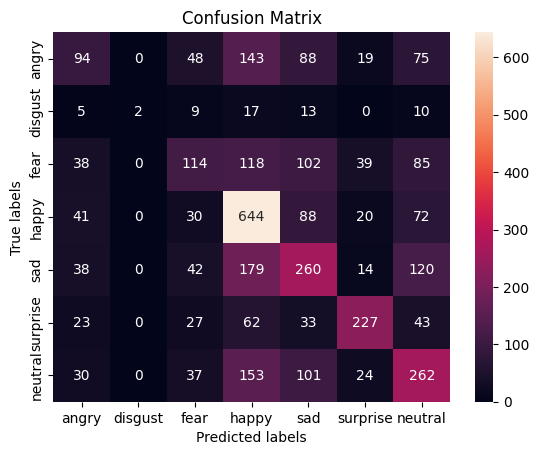

              precision    recall  f1-score   support

       angry       0.35      0.20      0.26       467
     disgust       1.00      0.04      0.07        56
        fear       0.37      0.23      0.28       496
       happy       0.49      0.72      0.58       895
         sad       0.38      0.40      0.39       653
    surprise       0.66      0.55      0.60       415
     neutral       0.39      0.43      0.41       607

    accuracy                           0.45      3589
   macro avg       0.52      0.37      0.37      3589
weighted avg       0.45      0.45      0.43      3589



In [56]:
from sklearn.svm import SVC

svm_multi = SVC(probability=True)
multi_y_train_pred, multi_y_test_pred = train_model(svm_multi, x_train, y_train, x_test)
display_classifier_metrics(y_train, multi_y_train_pred, y_test, multi_y_test_pred, average='weighted')
plot_confusion_matrix(y_test, multi_y_test_pred, labels=ALL_EMOTIONS)
print(classification_report(y_test, multi_y_test_pred, target_names=ALL_EMOTIONS))

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

### Part II - d) Interpretation/Analysis

After __applying Support Vector Machine__ for multiclass classification, we get an overall 44% accuracy on the test set. This is an improvement from both the Naive Bayes and Logistic Regressor classifiers.

However, __accuracy won't tell us much about our classification performance due to class imbalance__. Let's revise our performance by checking the following:

- **Confusion Matrix**: The values along the diagonal (e.g., 94 for Angry, 2 for Disgust, ..., 262 for neutral) represent the number of correct predictions for each class. This time the __confusion matrix__ has **even less Off-Diagonal Values** indicating missclassifications __an improvement from the previous classifiers but still struggling to classify less populated classes like 'neutral', 'fear', 'angry', 'disgust'__.

- **F1 Score for test set**: F1 Score is a useful metric to measure the __performance of classifications when having imbalaced data.__ This metric shows a __value of 0.42__. This is a better F1 score than our previous multi-class classifiers. However, it is still low (less than 0.5) and indicates that __our SVM classifier did not performed well__.
 
- **Class Imbalance**: The matrix shows that some classes, like "Happy", "Sad", and "Neutral", have significantly more instances than others, which __affects the model's performance__.

[Return to the Table of Contents](#toc)

### Part II - e) Question To Answer <a class="anchor" id="part-2e"></a>

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

In [244]:
# Saving SVM confusion matrix data into a dictionary for plotting
CONFUSION_MATRIX_VALUES = \
{'angry': [94, 0, 48, 143, 88, 19, 75],
 'disgust': [5, 2, 9, 17, 13, 0, 10],
 'fear': [38, 0, 114, 118, 102, 39, 85],
 'happy': [41, 0, 30, 644, 88, 20, 72],
 'sad': [38, 0, 42, 179, 260, 14, 120],
 'surprise': [23, 0, 27, 62, 33, 227, 43],
 'neutral': [30, 0, 37, 153, 101, 24, 262]}

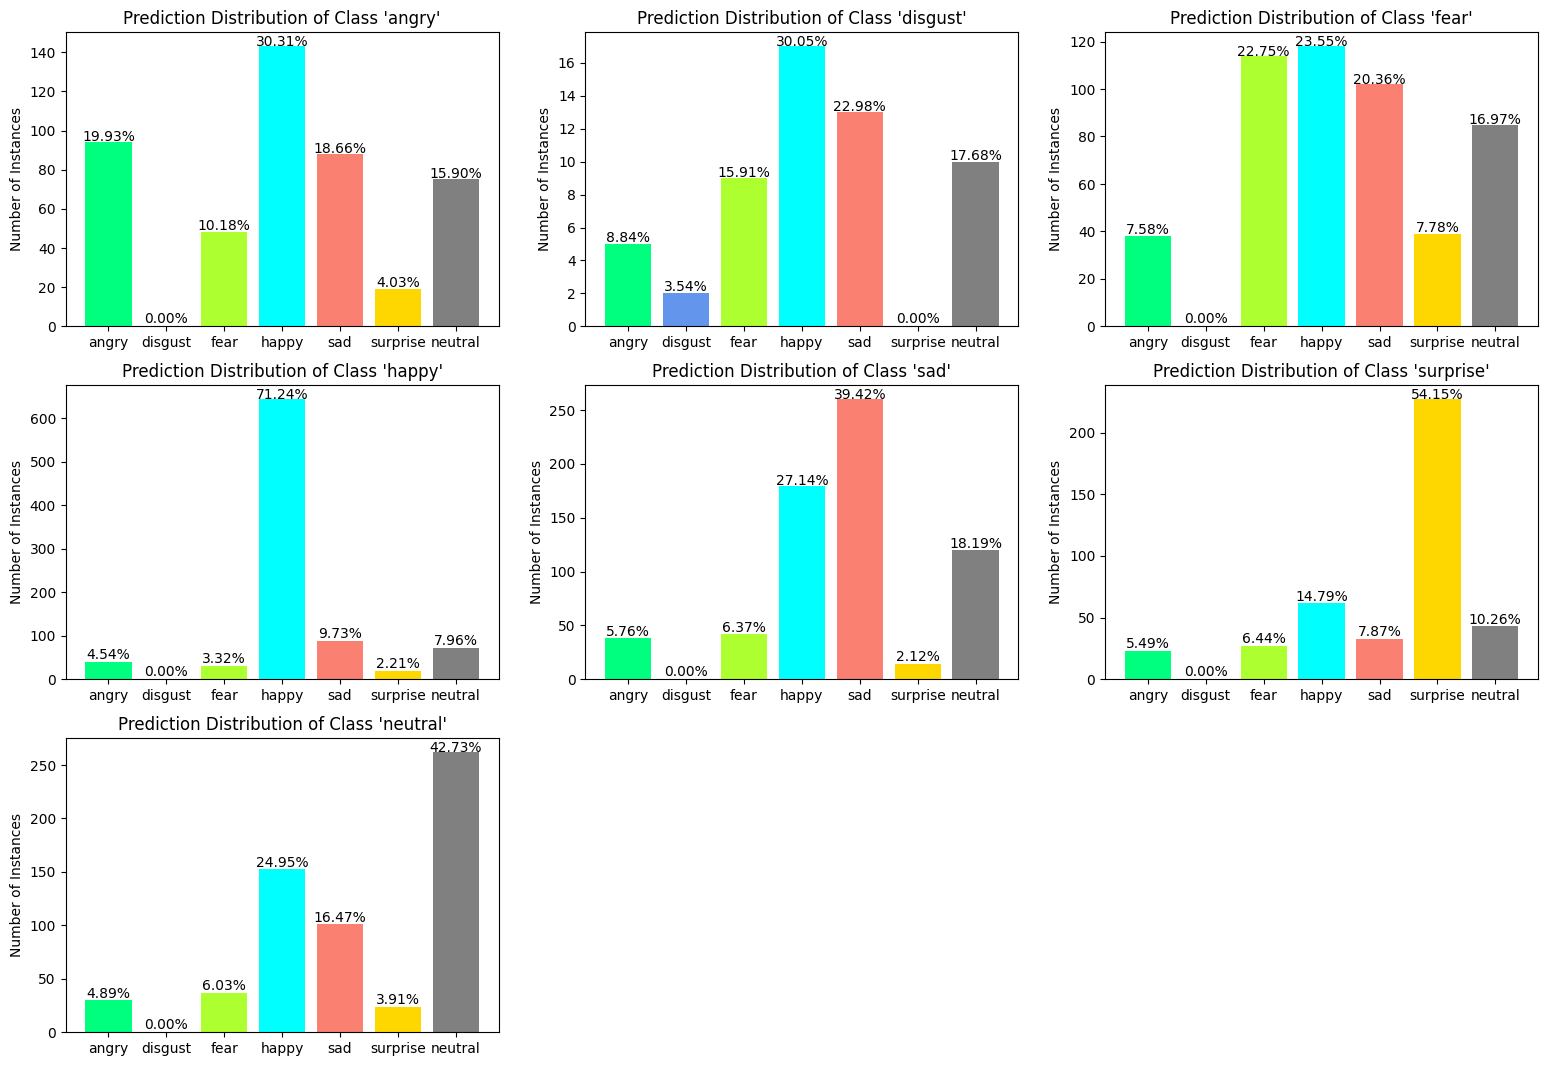

In [245]:
def plot_class_similarity(ALL_EMOTIONS):
    plt.figure(figsize=(19, 5))
    # loop through the target classes
    for i, emotion in enumerate(ALL_EMOTIONS):
        x_axis = np.arange(len(ALL_EMOTIONS))
        plt.subplot(3, 3, i+1)
        
        # plot bar plots for prediction distribution
        ax = plt.bar(x_axis, CONFUSION_MATRIX_VALUES[emotion], color=['springgreen', 'cornflowerblue', 'greenyellow', 'cyan', 'salmon', 'gold', 'grey'])
        plt.xticks(x_axis, ALL_EMOTIONS)
        plt.title(f"Prediction Distribution of Class '{emotion}'") 
        plt.ylabel("Number of Instances")

        # annotate bar percenteages
        rects = ax.patches
        total = sum([rect.get_height() for rect in rects])
        for i, value in enumerate(ALL_EMOTIONS):
            bar_height = 0.99 * rects[i].get_height()
            plt.text(i, bar_height, f"{100*(bar_height/total):.2f}%", ha='center', va='bottom')

    # adjust bar sizes
    plt.subplots_adjust(bottom=9.0, top=11.0)
    plt.show()

plot_class_similarity(ALL_EMOTIONS)

### Part II - e) Discussion

To **compare our class similarities** we plotted bar charts **showing the prediction distribution for each target class****.
This way we can **visualize** if **certain classes are being constantly predicted as other classes**, therefore indicating a similarity between the classes.
For each of the classes we got the following results:
- **'angry'**: most **similar to 'happy'** class (with **30.31% of angry instances labeled as happy**), and **least similar to 'disgust'** (with 0% of angry instances labeled as disgust)
- **'disgust'**: most **similar to 'happy'** class (with **30.05% of disgust instances labeled as happy**), and **least similar to 'surprise'** (with 0% of disgust instances labeled as surprise)
- **'fear'**: most **similar to 'happy'** class (with **23.55% of fear instances labeled as happy**), and **least similar to 'disgust'** (with 0% of fear instances labeled as surprise)
- **'happy'**: most **similar to 'sad'** class (with **9.73% of happy instances labeled as sad**), and **least similar to 'disgust'** (with 0% of happy instances labeled as disgust)
- **'sad'**: most **similar to 'happy'** class (with **27.14% of sad instances labeled as happy**), and **least similar to 'disgust'** (with 0% of sad instances labeled as disgust)
- **'surprise'**: most **similar to 'happy'** class (with **14.79% of surprise instances labeled as happy**), and **least similar to 'disgust'** (with 0% of surprise instances labeled as disgust)
- **'neutral'**: most **similar to 'happy'** class (with **24.95% of neutral instances labeled as happy**), and **least similar to 'disgust'** (with 0% of neutral instances labeled as disgust)

[Return to the Table of Contents](#toc)

### Part II - f) Solution to identify mislabeled images <a class="anchor" id="part-2f"></a>

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

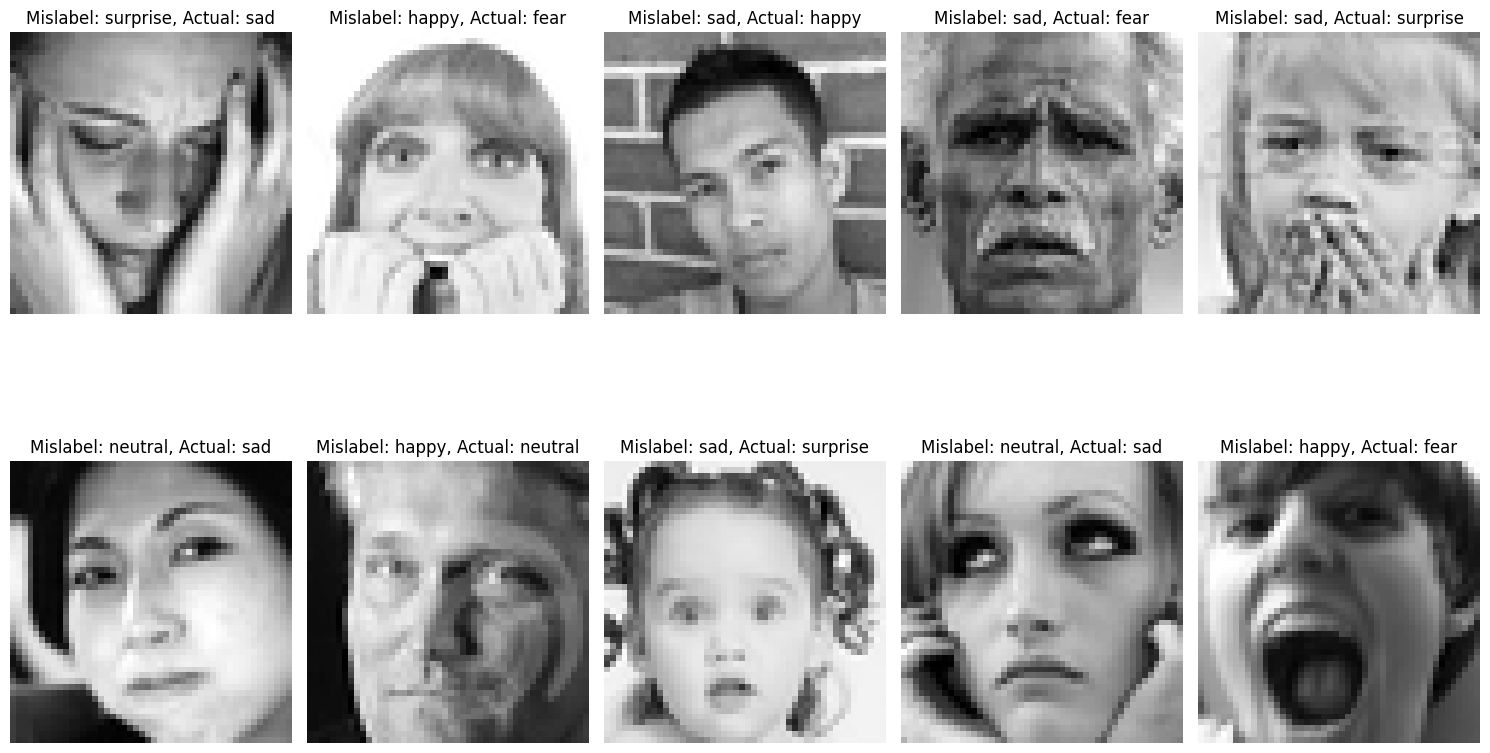

In [75]:
def identify_and_solve_mislabeled_images(model, x_test, y_test, ALL_EMOTIONS):
    # Predict on the test data and get their prediction probabilities
    y_test_pred = model.predict(x_test)
    y_test_pred_probas = model.predict_proba(x_test)
    
    # Set a threshold for confidence
    threshold = 0.6
    
    # Identify potentially mislabeled images
    mislabeled = []
    for i in range(len(y_test_pred)):
        if max(y_test_pred_probas[i]) < threshold and y_test_pred[i] != y_test[i]:
            mislabeled.append(i)
    
    # Randomly select 10 samples from the potentially mislabeled images
    if len(mislabeled) >= 10:  
        sample = np.random.choice(mislabeled, size=10, replace=False)
    
        # Display the selected samples
        plt.figure(figsize=(15, 10))
        for i, sample_index in enumerate(sample):
            plt.subplot(2, 5, i + 1)
            plt.imshow(x_test[sample_index].reshape(48,48), cmap='gray')
            predicted_emotion_index = y_test_pred[sample_index]
            actual_emotion_index = y_test[sample_index]
            plt.title(f'Mislabel: {ALL_EMOTIONS[predicted_emotion_index]}, Actual: {ALL_EMOTIONS[actual_emotion_index]}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()
        return
    print("Not enough mislabeled samples found.")

identify_and_solve_mislabeled_images(lr_multi, x_test, y_test, ALL_EMOTIONS)

### Part II - f) Interpretation/Analysis

**Identifying potentially mislabeled images**

**Overview**
This approach uses our classifier to predict labels for a multiclass dataset and identifies potentially mislabeled images based on the model’s confidence in its predictions. Images where the model has **low confidence** (below a defined threshold<0.6) and makes a wrong prediction are flagged as potentially mislabeled.

**Steps:**
1. Given a model (passed as parameter) **predict and obtain the prediction probabilities**. 
2. **Set a confidence threshold**. We set a threshold of 0.6. This means that if the model’s confidence in a prediction is less than 85%, then we assume the label is incorrect and we flag the image as potentially mislabeled.
3. **Select and display samples**. We randomly select 10 images from the set of potentially mislabeled images and display them for visual inspection, showing both the mislabel and potential actual labels.

[Return to the Table of Contents](#toc)



# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [ ]:
# YOUR CODE HERE